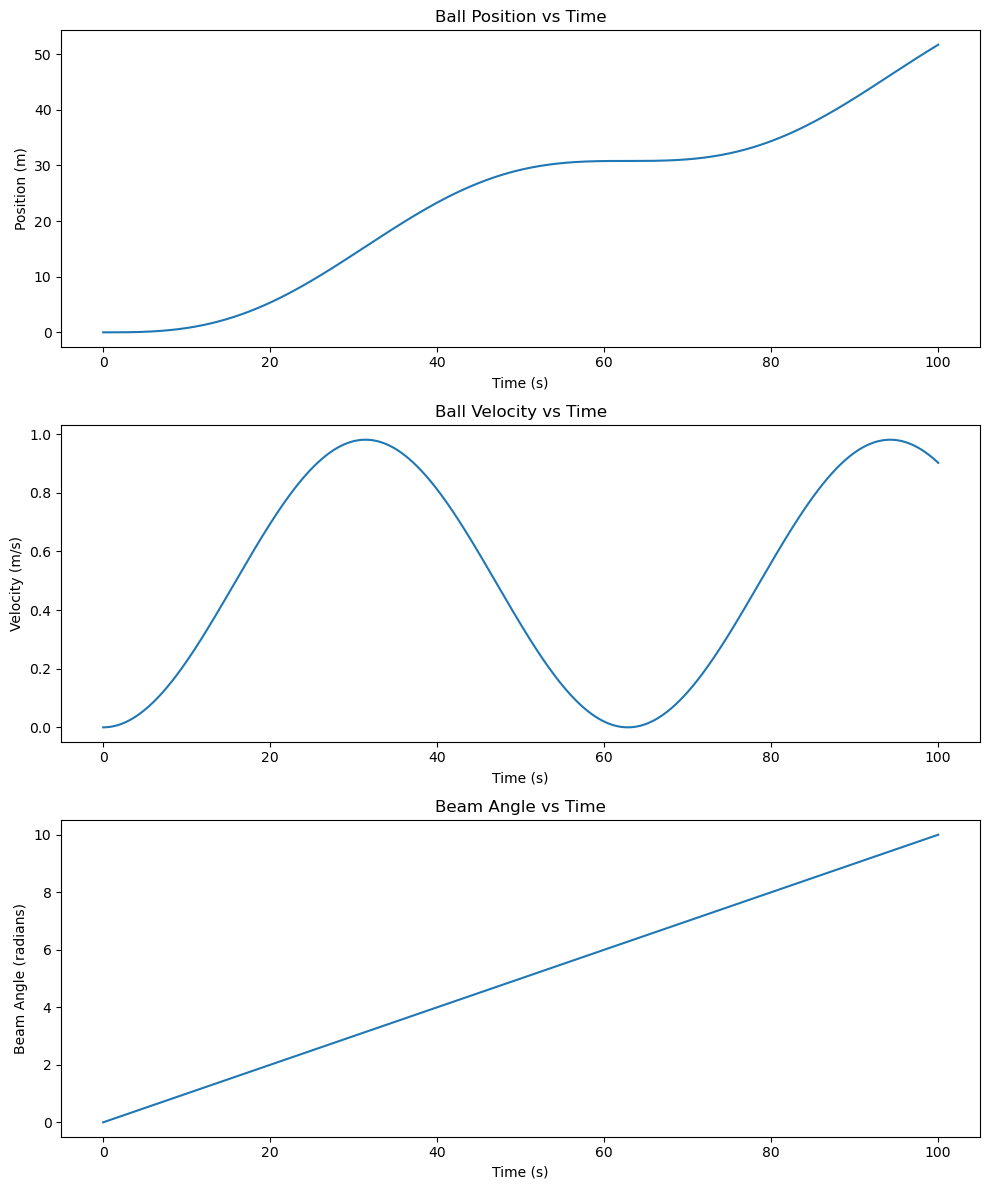

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
m = 0.005        # Mass of the ball (kg)
g = 9.81          # Gravitational acceleration (m/s^2)
beam_length = 10.0 # Length of the beam (m)
gear_speed = 0.1 # Rad/s, gear rotation speed (controls how quickly the beam tilts)
ball_radius = 0.05  # Radius of the ball (m)

# Initial conditions
initial_ball_position = 0.0  # Ball's initial position (m)
initial_ball_velocity = 0.0  # Ball's initial velocity (m/s)
initial_beam_angle = 0.0     # Beam's initial angle (radians)

# Differential equation model
def model(state, t):
    x, v, theta = state  # position, velocity, and angle of the beam
    a = m * g * np.sin(theta)  # acceleration due to gravity along the beam

    # System equations
    dxdt = v  # velocity is the derivative of position
    dvdt = a  # acceleration is the second derivative of position
    dthetadt = gear_speed  # The gear speed determines the rate of change of the beam's angle

    return [dxdt, dvdt, dthetadt]

# Time vector
t = np.linspace(0, 100, 1000)  # Time for model

# Initial state: [position, velocity, angle of the beam]
initial_state = [initial_ball_position, initial_ball_velocity, initial_beam_angle]  # Start with a horizontal beam

# Solve the ODE
solution = odeint(model, initial_state, t)

# Extract position, velocity, and beam angle
position = solution[:, 0]
velocity = solution[:, 1]
beam_angle = solution[:, 2]

# Plot the behavior of the ball and beam
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Ball's position vs time
#weird behavior where the ball can only move in one direction
axs[0].plot(t, position)
axs[0].set_title('Ball Position vs Time')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Position (m)')
#axs[0].set_ylim(0, beam_length)

# Plot 2: Ball's velocity vs time
axs[1].plot(t, velocity)
axs[1].set_title('Ball Velocity vs Time')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (m/s)')

# Plot 3: Beam Angle vs Time
#some issue with just adding up gear speed not sure how to fix could fix by find implementing the relation between the beam angle and gear angle
axs[2].plot(t, beam_angle)
axs[2].set_title('Beam Angle vs Time')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Beam Angle (radians)')

plt.tight_layout()
plt.show()


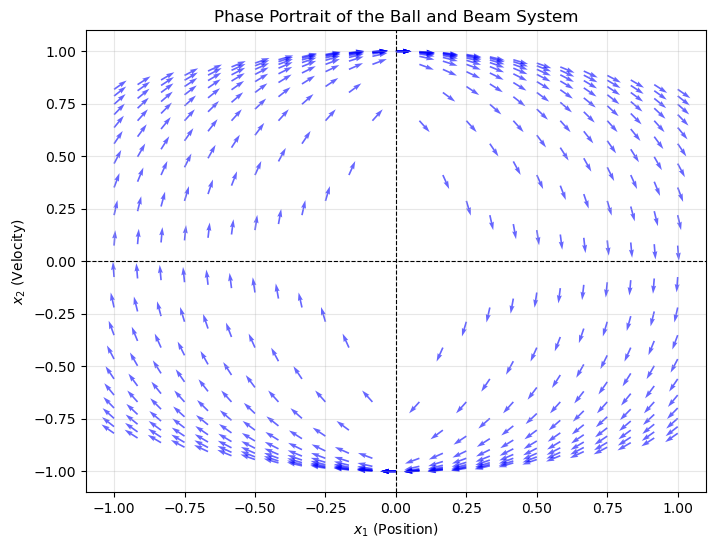

In [21]:
# Parameters
m = 1.0  # mass of the ball (kg)
g = 9.81  # gravity (m/s^2)
d = 0.1  # lever arm offset (m)
L = 1.0  # length of the beam (m)
R = 0.05  # ball's radius (m)
J = (2/5) * m * R**2  # ball's moment of inertia (kg.m^2)

# Derived parameter
M = J / R**2 + m
k = m * -g * d / (M * L**2)  # constant factor

# Generate a grid of initial conditions for the phase portrait
x1_vals = np.linspace(-L, L, 25)
x2_vals = np.linspace(-1, 1, 20)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Compute the flow vectors
U = X2
V = k * X1

# Normalize vectors for better visualization
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude
V /= magnitude

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.quiver(X1, X2, U, V, color="blue", alpha=0.6)
plt.title("Phase Portrait of the Ball and Beam System")
plt.xlabel("$x_1$ (Position)")
plt.ylabel("$x_2$ (Velocity)")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(alpha=0.3)
plt.show()

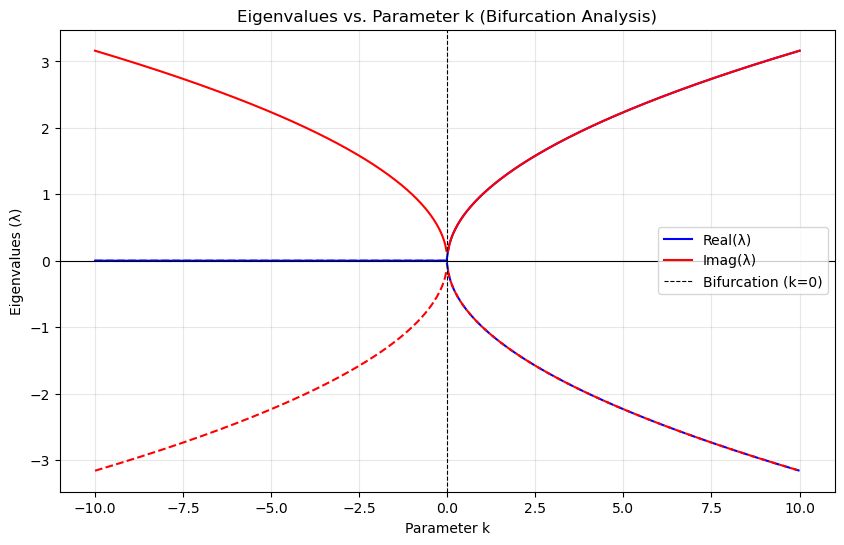

In [5]:
# Define the eigenvalues and parameter k
k_values = np.linspace(-10, 10, 500)  # range of k values
eigenvalues_real = np.zeros_like(k_values)  # real part of eigenvalues
eigenvalues_imag = np.sqrt(np.abs(k_values))  # imaginary part of eigenvalues

# Determine the nature of eigenvalues based on k
eigenvalues_real[k_values > 0] = np.sqrt(k_values[k_values > 0])  # real part for k > 0
eigenvalues_real[k_values < 0] = 0  # real part is 0 for k < 0

# Plot the eigenvalues
plt.figure(figsize=(10, 6))

# Plot real parts of eigenvalues
plt.plot(k_values, eigenvalues_real, label="Real(λ)", color="blue")
plt.plot(k_values, -eigenvalues_real, color="blue", linestyle="--")

# Plot imaginary parts of eigenvalues
plt.plot(k_values, eigenvalues_imag, label="Imag(λ)", color="red")
plt.plot(k_values, -eigenvalues_imag, color="red", linestyle="--")

# Highlight the bifurcation point at k = 0
plt.axvline(0, color="black", linestyle="--", linewidth=0.8, label="Bifurcation (k=0)")
plt.axhline(0, color="black", linewidth=0.8)

# Label the plot
plt.title("Eigenvalues vs. Parameter k (Bifurcation Analysis)")
plt.xlabel("Parameter k")
plt.ylabel("Eigenvalues (λ)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()